# ✅ Сравним собственную реализацию дерева с scikit-learn

## ⭐ Импорты

In [1]:
from time import time

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as tree_sk
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from upninja.models.Trees.DecisionTreeClassifier import DecisionTreeClassifier as tree_my

/Users/romanseleznyov/anaconda3/lib/python3.13/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## ⭐ Подготовим данные

In [2]:
dataset = pd.read_csv('data/breast-cancer.csv')
dataset.drop('id', axis=1, inplace=True)
dataset['diagnosis'] = (dataset['diagnosis'] == 'M').astype(int)

cor_target = abs(dataset.corr()['diagnosis'])
relevant_features = cor_target[cor_target>0.25]
names = [index for index, value in relevant_features.items()]
names.remove('diagnosis')

X = dataset[names].values
y = dataset['diagnosis'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## ⭐ Собственная реализация

In [3]:
my_tree = tree_my(min_samples=10,
                  max_depth=5
                 )

my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('tree-classifier', my_tree)
])

start_time = time()
my_pipe.fit(X_train, y_train)
end_time = time()
pred = my_pipe.predict(X_test)
print('⌛Fit time: ', end_time - start_time, ' (seconds)')
print('🎯Accuracy: ', accuracy_score(y_test, pred))

⌛Fit time:  2.5690207481384277  (seconds)
🎯Accuracy:  0.9385964912280702


/Users/romanseleznyov/anaconda3/lib/python3.13/site-packages/sklearn/pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


## ⭐ Scikit-learn

In [4]:
sk_tree = tree_sk(min_samples_leaf=10,
                  max_depth=5
                 )

sk_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('tree-classifier', sk_tree)
])

start_time = time()
sk_pipe.fit(X_train, y_train)
end_time = time()
pred = sk_pipe.predict(X_test)
print('⌛Fit time: ', end_time - start_time, ' (seconds)')
print('🎯Accuracy: ', accuracy_score(y_test, pred))

⌛Fit time:  0.0036759376525878906  (seconds)
🎯Accuracy:  0.9473684210526315


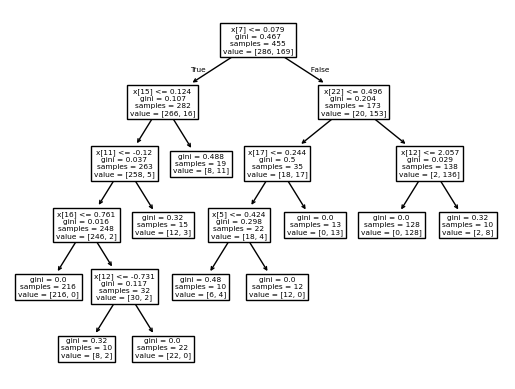

In [5]:
dt_plt = plot_tree(sk_pipe.named_steps['tree-classifier'])